# ***Phase 1: Data Mining and visualizations***

To gain more insights on the preprocessed "Top games on Twitch 2016 - 2023"(https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch/data) dataset, we extract the 'Genres' of each game from the "Popular Video Games 1980 - 2023 🎮"(https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023) dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
df_2020 = pd.read_csv("df_2020_preprocessed.csv")
streamer_data = pd.read_csv("twitchdata-update.csv")
# game_category_data = pd.read_csv("games.csv")

In [2]:
df_2020.shape

(2600, 15)

In [3]:
# game_category_data.head()

# Bar Plot
Total Hours Watched per Game Genre (Aug 2019 to Aug 2020)

                 Genres  Hours_watched    Avg_viewers  Streamers
7             Not_found     7897762606    6467.884892   22733122
11                  RPG     3715601943   13794.260870   14172913
0             Adventure     3648223054    8739.892982   16630881
17             Strategy     3368010391   24863.870270   12808544
14              Shooter     2901776062   15980.500000   16224586
6                  MOBA     1492764985  156978.461538    2836005
15            Simulator      612898530    5194.037267    3673612
5                 Indie      418366020    3202.500000    2689366
19  Turn Based Strategy      319454149    8233.490566     304760
3     Card & Board Game      289892169   24756.625000     206147
2               Brawler      184563455    4114.327869     475900
8              Platform      183799502    2198.368421     946150
18             Tactical      163112473   11161.550000    1709691
4              Fighting      120264982    2130.285714     598876
12               Racing  

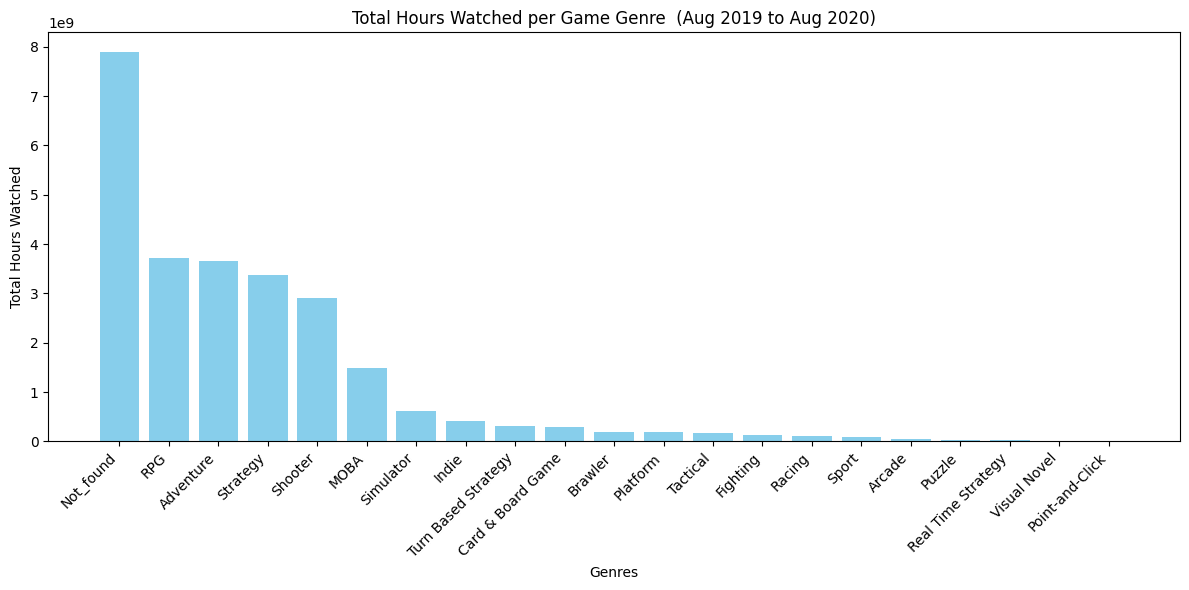

In [4]:
import pandas as pd
import numpy as np

# Load the game category data
game_category_data = pd.read_csv("games.csv")

# Clean and preprocess genres in game_category_data
game_category_data['Genres'] = game_category_data['Genres'].apply(
    lambda x: eval(x) if isinstance(x, str) else ['Not_found']
)
game_category_data['Genres'] = game_category_data['Genres'].apply(lambda x: x if len(x) > 0 else ['Not_found'])

# Create a mapping from game titles to genres
title_to_genre = game_category_data.set_index('Title')['Genres'].to_dict()

# Add a 'Genres' column to df_2020 based on game title
df_2020['Genres'] = df_2020['Game'].map(title_to_genre)

# Handle missing genres (games not found in game_category_data)
df_2020['Genres'] = df_2020['Genres'].apply(lambda x: x if isinstance(x, list) else ['Not_found'])

# Explode genres to analyze data at the individual genre level
df_genre_analysis = df_2020.explode('Genres')

# Aggregate data by genres
genre_stats = df_genre_analysis.groupby('Genres').agg({
    'Hours_watched': 'sum',
    'Avg_viewers': 'mean',
    'Streamers': 'sum'
}).reset_index()

# Sort data by total hours watched
genre_stats = genre_stats.sort_values('Hours_watched', ascending=False)

print(genre_stats)

# Visualization: Bar plot for total hours watched per genre
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(genre_stats['Genres'], genre_stats['Hours_watched'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Total Hours Watched per Game Genre  (Aug 2019 to Aug 2020)')
plt.xlabel('Genres')
plt.ylabel('Total Hours Watched')
plt.tight_layout()
plt.show()


# Parallel Coordinates plot(Interactive)
Plotting the Parallel Coordinates plot for key Metrics

In [5]:
df_2020.head()

Rank               Game  Month  Year  Hours_watched  Hours_streamed  \
0     1           Fortnite      8  2019       89053008         5436945   
1     2  League of Legends      8  2019       86094493         1977780   
2     3             Dota 2      8  2019       70885379          487148   
3     4  World of Warcraft      8  2019       67894760         1594116   
4     5      Just Chatting      8  2019       65042052         1002669   

   Peak_viewers  Peak_channels  Streamers  Avg_viewers  Avg_channels  \
0        357529          14870     596217       119856          7317   
1        455329           5256     187707       115874          2661   
2       1045985           1174      37081        95404           655   
3       1103295          19085     111263        91379          2145   
4        203000           1967     155221        87539          1349   

   Avg_viewer_ratio        Date  Viewer_Streamer_Ratio  Hours_per_Channel  \
0             16.38  2019-08-01               0.201027        5988.769872   
1             43.53  2019-08-01               0.617313       16380.230784   
2            145.51  2019-08-01               2.572854       60379.368825   
3             42.59  2019-08-01               0.821288        3557.493319   
4             64.87  2019-08-01               0.563964       33066.625318   

                                Genres  
0  [Adventure, RPG, Shooter, Strategy]  
1                [MOBA, RPG, Strategy]  
2                          [Not_found]  
3                     [Adventure, RPG]  
4                          [Not_found]

In [6]:
import plotly.express as px
import pandas as pd

# Ensure the DataFrame contains all required columns
df_2020_subset = df_2020[[
    'Rank', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio', 
    'Hours_watched', 'Hours_streamed', 'Peak_viewers', 
    'Hours_per_Channel', 'Viewer_Streamer_Ratio'
]]

# Interactive Parallel Coordinates Plot
fig = px.parallel_coordinates(
    df_2020_subset,
    dimensions=[
        'Hours_watched', 'Hours_streamed', 'Peak_viewers', 
        'Avg_viewers', 'Avg_channels', 'Hours_per_Channel', 
        'Avg_viewer_ratio', 'Viewer_Streamer_Ratio'
    ],  # Metrics to visualize
    color='Rank',  # Coloring based on 'Rank'
    color_continuous_scale=px.colors.sequential.Viridis,  # Customize color palette
    labels={
        'Hours_watched': 'Hours Watched',
        'Hours_streamed': 'Hours Streamed',
        'Peak_viewers': 'Peak Viewers',
        'Avg_viewers': 'Average Viewers',
        'Avg_channels': 'Average Channels',
        'Hours_per_Channel': 'Hours per Channel',
        'Avg_viewer_ratio': 'Viewer Ratio',
        'Viewer_Streamer_Ratio': 'Viewer to Streamer Ratio',
        'Rank': 'Rank'
    },
    title="Interactive Parallel Coordinates: Viewer & Streamer Metrics"
)

# Show plot
fig.show()


Let's reorder the parallel axes for better readability

In [7]:
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns

# Select numerical columns
columns_to_cluster = [
    'Hours_watched', 'Hours_streamed', 'Peak_viewers', 
    'Avg_viewers', 'Avg_channels', 'Hours_per_Channel', 
    'Avg_viewer_ratio', 'Viewer_Streamer_Ratio'
]

# Calculate the correlation matrix
correlation_matrix = df_2020[columns_to_cluster].corr()

# Use hierarchical clustering to find a good order for the axes
dissimilarity = 1 - np.abs(correlation_matrix)  # Convert correlations to dissimilarities
linkage_matrix = sch.linkage(sch.distance.squareform(dissimilarity), method='ward')
dendro = sch.dendrogram(linkage_matrix, labels=columns_to_cluster, no_plot=True)

# Reorder columns based on clustering
reordered_columns = [columns_to_cluster[i] for i in dendro['leaves']]

# Reorder dimensions in the PCP
fig = px.parallel_coordinates(
    df_2020_subset,
    dimensions=reordered_columns,  # Reordered dimensions
    color='Rank',
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={
        'Hours_watched': 'Hours Watched',
        'Hours_streamed': 'Hours Streamed',
        'Peak_viewers': 'Peak Viewers',
        'Avg_viewers': 'Average Viewers',
        'Avg_channels': 'Average Channels',
        'Hours_per_Channel': 'Hours per Channel',
        'Avg_viewer_ratio': 'Viewer Ratio',
        'Viewer_Streamer_Ratio': 'Viewer to Streamer Ratio',
        'Rank': 'Rank'
    },
    title="Reordered Parallel Coordinates: Viewer & Streamer Metrics"
)

# Show plot
fig.show()


# SPLOM
SPLOM for Numerical Features

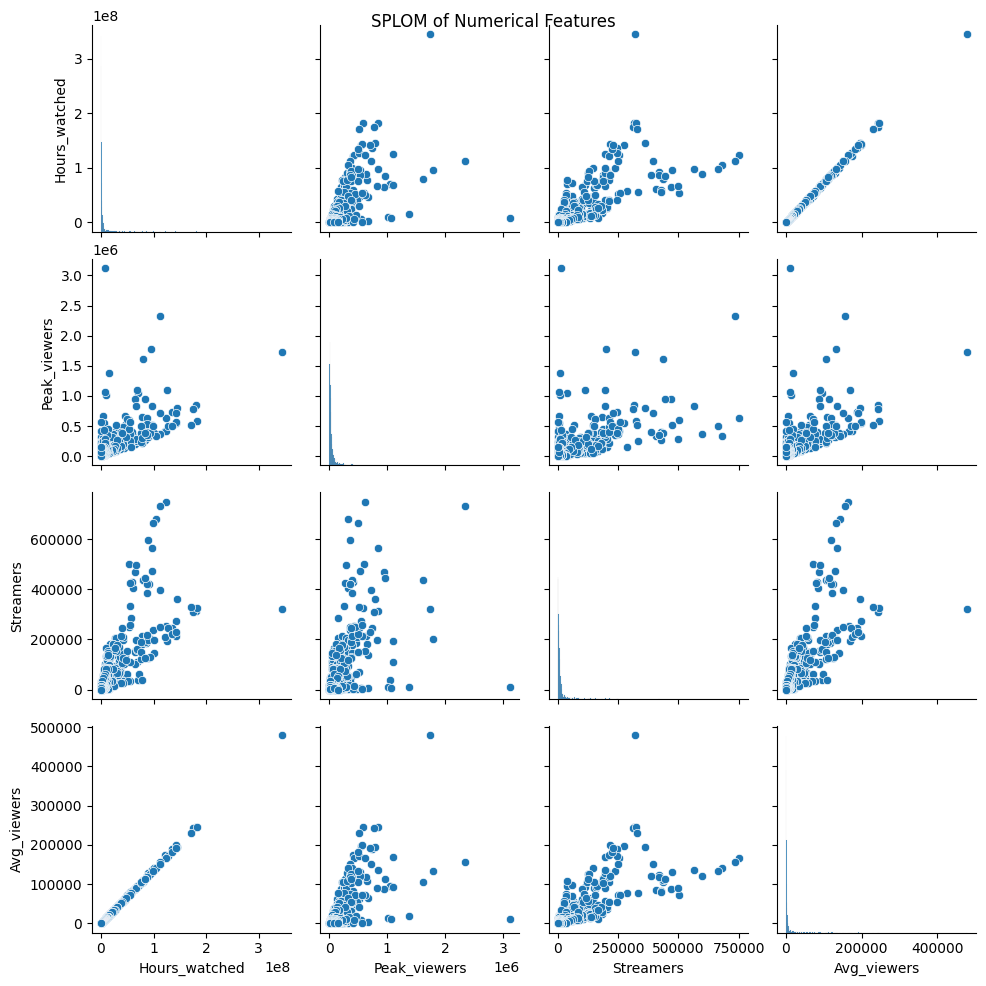

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np

sns.pairplot(df_2020[['Hours_watched', 'Peak_viewers', 'Streamers', 'Avg_viewers']])
plt.suptitle("SPLOM of Numerical Features")
plt.show()


In [9]:
streamer_data.head()

Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     English  
4   False     English

In [10]:
df_2020.head()

Rank               Game  Month  Year  Hours_watched  Hours_streamed  \
0     1           Fortnite      8  2019       89053008         5436945   
1     2  League of Legends      8  2019       86094493         1977780   
2     3             Dota 2      8  2019       70885379          487148   
3     4  World of Warcraft      8  2019       67894760         1594116   
4     5      Just Chatting      8  2019       65042052         1002669   

   Peak_viewers  Peak_channels  Streamers  Avg_viewers  Avg_channels  \
0        357529          14870     596217       119856          7317   
1        455329           5256     187707       115874          2661   
2       1045985           1174      37081        95404           655   
3       1103295          19085     111263        91379          2145   
4        203000           1967     155221        87539          1349   

   Avg_viewer_ratio        Date  Viewer_Streamer_Ratio  Hours_per_Channel  \
0             16.38  2019-08-01               0.201027        5988.769872   
1             43.53  2019-08-01               0.617313       16380.230784   
2            145.51  2019-08-01               2.572854       60379.368825   
3             42.59  2019-08-01               0.821288        3557.493319   
4             64.87  2019-08-01               0.563964       33066.625318   

                                Genres  
0  [Adventure, RPG, Shooter, Strategy]  
1                [MOBA, RPG, Strategy]  
2                          [Not_found]  
3                     [Adventure, RPG]  
4                          [Not_found]

In [11]:
# Convert 'Month' to datetime format using numeric months
df_2020['Date'] = pd.to_datetime(df_2020['Month'], format='%m')


Add a Date Column to df_2020
The Month column contains numeric values (e.g., 1 for January), so we can convert it to a Date column:


In [12]:
# Set custom year (e.g., 2020)
df_genre_analysis['Date'] = pd.to_datetime(df_genre_analysis['Month'], format='%m').dt.strftime('2020-%m-01')
df_2020['Date'] = pd.to_datetime(df_2020['Date'])  # Convert back to datetime object


In [13]:
df_2020.shape

(2600, 16)

# ***Phase 2: Re-merging with a Human in the Loop***

As there are too many 'Not_found' games, we merge both the datasets again. This time, we'll also manually add pairing between 'Not_found' games and genres. 
This manual mapping can be found in Not_found_games.csv

There were 350+ games to which we manually assigned Genres

In [14]:
import pandas as pd

# Load the data
# df_2020 = pd.read_csv('df_2020.csv')  # Main data file
df_2020 = pd.read_csv("df_2020_preprocessed.csv")
game_category_data = pd.read_csv('games.csv')  # File containing game titles and genres
not_found_games = pd.read_csv('Not_found_games.csv')  # File for missing genre mappings

# Merge genre data with df_2020, aligning 'Game' with 'Title'
df_genre_analysis = pd.merge(
    df_2020[['Game', 'Date', 'Hours_watched', 'Hours_streamed', 'Peak_viewers',
             'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels',
             'Avg_viewer_ratio', 'Viewer_Streamer_Ratio', 'Hours_per_Channel']],
    game_category_data[['Title', 'Genres']],
    left_on='Game',  # Use 'Game' from df_2020
    right_on='Title',  # Use 'Title' from game_category_data
    how='left'
)

# Drop the 'Title' column (not needed after the merge)
df_genre_analysis.drop(columns=['Title'], inplace=True)

# Ensure 'Genres' is a list; fill missing values with 'Not_found'
df_genre_analysis['Genres'] = df_genre_analysis['Genres'].apply(
    lambda x: x.split(', ') if isinstance(x, str) else ['Not_found']
)

# Handle 'Not_found' genres using the not_found_games mapping
not_found_mapping = not_found_games.set_index('Game')['Genre'].to_dict()
df_genre_analysis['Genres'] = df_genre_analysis.apply(
    lambda row: row['Genres'] if 'Not_found' not in row['Genres'] else 
    not_found_mapping.get(row['Game'], ['Not_found']),
    axis=1
)

# Explode 'Genres' so each genre has its own row
df_genre_analysis = df_genre_analysis.explode('Genres').reset_index(drop=True)

# **Clean up the 'Genres' column to remove unwanted characters**
df_genre_analysis['Genres'] = df_genre_analysis['Genres'].str.replace(r"[\[\]']", '', regex=True)

# Generate df_game_genres (Game-Genre mappings)
df_game_genres = (
    df_genre_analysis[['Game', 'Genres']]  # Select relevant columns
    .drop_duplicates()                     # Drop duplicate game-genre pairs
    .reset_index(drop=True)                # Reset index
)

# Optional: Filter out rows with 'Not_found' in 'Genres'
df_game_genres = df_game_genres[df_game_genres['Genres'] != 'Not_found']

# Verify the shape of df_game_genres
print(f"df_game_genres generated successfully with shape: {df_game_genres.shape}")

# Save the resulting DataFrame to a CSV file
output_file = "Games_and_Genres.csv"
df_game_genres.to_csv(output_file, index=False)
print(f"File saved to {output_file}")


df_game_genres generated successfully with shape: (777, 2)
File saved to Games_and_Genres.csv


In [15]:
# Filter df_genre_analysis for rows where the genre is 'Not_found'
not_found_games = df_genre_analysis[df_genre_analysis['Genres'] == 'Not_found']

# Check if there are any games with 'Not_found' in their genres
if not_found_games.empty:
    print("All games have been successfully mapped to valid genres.")
else:
    print("Games still mapped to 'Not_found':")
    print(not_found_games[['Game', 'Genres']])
    print(f"Count of games with 'Not_found': {not_found_games.shape[0]}")


All games have been successfully mapped to valid genres.


In [16]:
df_genre_analysis.shape

(5614, 13)

In [17]:
df_genre_analysis.head()

Game        Date  Hours_watched  Hours_streamed  Peak_viewers  \
0           Fortnite  2019-08-01       89053008         5436945        357529   
1           Fortnite  2019-08-01       89053008         5436945        357529   
2           Fortnite  2019-08-01       89053008         5436945        357529   
3           Fortnite  2019-08-01       89053008         5436945        357529   
4  League of Legends  2019-08-01       86094493         1977780        455329   

   Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
0          14870     596217       119856          7317             16.38   
1          14870     596217       119856          7317             16.38   
2          14870     596217       119856          7317             16.38   
3          14870     596217       119856          7317             16.38   
4           5256     187707       115874          2661             43.53   

   Viewer_Streamer_Ratio  Hours_per_Channel     Genres  
0               0.201027        5988.769872  Adventure  
1               0.201027        5988.769872        RPG  
2               0.201027        5988.769872    Shooter  
3               0.201027        5988.769872   Strategy  
4               0.617313       16380.230784       MOBA

% Count of Games per category:

In [18]:
import plotly.express as px

# Count the number of games per genre
genre_counts = df_genre_analysis['Genres'].value_counts().reset_index()
genre_counts.columns = ['Genres', 'Count']

# Create the donut chart with hover effects
fig = px.pie(genre_counts, names='Genres', values='Count', hole=0.3, 
             title='Distribution of Games by Genre', 
             labels={'Genres': 'Game Genres', 'Count': 'Number of Games'},
             hover_data=['Count'])

# Update chart properties
fig.update_traces(textinfo='percent+label', hoverinfo='label+percent+value')

# Set the size of the plot to make sure it's fully visible
fig.update_layout(
    width=800,  # Adjust the width as necessary
    height=600  # Adjust the height as necessary
)

# Show the plot
fig.show()


In [19]:
import plotly.express as px
import pandas as pd

# Group by genre and game, then sum the total watch time
top_games_per_genre = df_genre_analysis.groupby(['Genres', 'Game'])['Hours_watched'].sum().reset_index()

# Sort the data by genre and hours watched, then select top 3 games for each genre
top_games_per_genre_sorted = top_games_per_genre.sort_values(by=['Genres', 'Hours_watched'], ascending=[True, False])

# Get the top 3 games for each genre
top_3_games = top_games_per_genre_sorted.groupby('Genres').head(3)

# # Create an interactive bar plot
# fig = px.bar(top_3_games, x='Game', y='Hours_watched', color='Genres', 
#              title='Top 3 Games per Genre by Total Watch Time',
#              labels={'Game': 'Game Name', 'Hours_watched': 'Total Hours Watched'},
#              category_orders={'Genres': top_3_games['Genres'].unique()},
#              hover_data={'Game': True, 'Hours_watched': True})

# # Show the plot
# fig.update_layout(
#     width=800,
#     height=600
# )
# fig.show()


In [20]:
import plotly.express as px

# Treemap visualization for top 3 games per genre by total watch time
fig = px.treemap(top_3_games, 
                 path=['Genres', 'Game'], 
                 values='Hours_watched', 
                 color='Genres', 
                 hover_data=['Hours_watched'],
                 title='Top 3 Games per Genre by Total Watch Time (Treemap)')

# Show the plot
fig.show()


In [21]:
df_genre_analysis.head()

Game        Date  Hours_watched  Hours_streamed  Peak_viewers  \
0           Fortnite  2019-08-01       89053008         5436945        357529   
1           Fortnite  2019-08-01       89053008         5436945        357529   
2           Fortnite  2019-08-01       89053008         5436945        357529   
3           Fortnite  2019-08-01       89053008         5436945        357529   
4  League of Legends  2019-08-01       86094493         1977780        455329   

   Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
0          14870     596217       119856          7317             16.38   
1          14870     596217       119856          7317             16.38   
2          14870     596217       119856          7317             16.38   
3          14870     596217       119856          7317             16.38   
4           5256     187707       115874          2661             43.53   

   Viewer_Streamer_Ratio  Hours_per_Channel     Genres  
0               0.201027        5988.769872  Adventure  
1               0.201027        5988.769872        RPG  
2               0.201027        5988.769872    Shooter  
3               0.201027        5988.769872   Strategy  
4               0.617313       16380.230784       MOBA

# Sankey Plot
Let's make a Sankey(Parallel sets plot) with the now acquired categorical variable(Genres) 

In [22]:
df_genre_analysis.head()

Game        Date  Hours_watched  Hours_streamed  Peak_viewers  \
0           Fortnite  2019-08-01       89053008         5436945        357529   
1           Fortnite  2019-08-01       89053008         5436945        357529   
2           Fortnite  2019-08-01       89053008         5436945        357529   
3           Fortnite  2019-08-01       89053008         5436945        357529   
4  League of Legends  2019-08-01       86094493         1977780        455329   

   Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
0          14870     596217       119856          7317             16.38   
1          14870     596217       119856          7317             16.38   
2          14870     596217       119856          7317             16.38   
3          14870     596217       119856          7317             16.38   
4           5256     187707       115874          2661             43.53   

   Viewer_Streamer_Ratio  Hours_per_Channel     Genres  
0               0.201027        5988.769872  Adventure  
1               0.201027        5988.769872        RPG  
2               0.201027        5988.769872    Shooter  
3               0.201027        5988.769872   Strategy  
4               0.617313       16380.230784       MOBA

In [23]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Replace 'df' with your actual DataFrame
# Assuming df is your DataFrame with appropriate columns
# Example: df = pd.read_csv("your_data.csv")

# Prepare the data
categories = ['Genres', 'Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed']

# Create the unique category labels and indices for each dimension
unique_categories = {
    'Genres': df_genre_analysis['Genres'].unique(),
    'Avg_viewers': df_genre_analysis['Avg_viewers'].unique(),
    'Peak_viewers': df_genre_analysis['Peak_viewers'].unique(),
    'Hours_watched': df_genre_analysis['Hours_watched'].unique(),
    'Hours_streamed': df_genre_analysis['Hours_streamed'].unique()
}

# Create a list of nodes (all unique category labels combined)
nodes = list(set(df_genre_analysis['Genres'].unique()).union(
    df_genre_analysis['Avg_viewers'].unique(),
    df_genre_analysis['Peak_viewers'].unique(),
    df_genre_analysis['Hours_watched'].unique(),
    df_genre_analysis['Hours_streamed'].unique()
))

# Create a dictionary that maps the labels to node indices
node_indices = {node: idx for idx, node in enumerate(nodes)}

# Define the Sankey plot data: links and the corresponding sources and targets
links = []

# Create a color palette for the genres
genre_palette = sns.color_palette("hls", len(df_genre_analysis['Genres'].unique())).as_hex()
genre_colors = {genre: color for genre, color in zip(df_genre_analysis['Genres'].unique(), genre_palette)}

for _, row in df_genre_analysis.iterrows():
    for i in range(len(categories) - 1):
        source = node_indices[row[categories[i]]]
        target = node_indices[row[categories[i + 1]]]
        link_color = genre_colors[row['Genres']]
        links.append({'source': source, 'target': target, 'value': 1, 'color': link_color})

# Define the Sankey plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color='lightgray',
        hovertemplate="%{label}"
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
        color=[link['color'] for link in links],
        hovertemplate="Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value:.0f}"
    )
))

# Update layout for the plot
fig.update_layout(
    title="Sankey Plot: Genre, Viewer, and Hour Metrics Flow",
    width=1000,
    height=700,
    # Remove axis numbers (ticks and labels) and gridlines
    xaxis=dict(
        showticklabels=False,
        showgrid=False
    ),
    yaxis=dict(
        showticklabels=False,
        showgrid=False
    ),
    # Add labels for the axes (custom annotations)
    annotations=[
        dict(
            x=0.05, y=0.95, text="Genres", showarrow=False, font=dict(size=14, color="black"),
            align="left", xanchor="left", yanchor="top"
        ),
        dict(
            x=0.2, y=-0.05, text="Viewer Metrics", showarrow=False, font=dict(size=14, color="black"),
            align="center", xanchor="left", yanchor="bottom"
        ),
        dict(
            x=0.95, y=-0.05, text="Hours Metrics", showarrow=False, font=dict(size=14, color="black"),
            align="right", xanchor="right", yanchor="bottom"
        ),
        dict(
            x=0.18, y=-0.1, text="Avg. Viewers, Peak Viewers", showarrow=False, font=dict(size=12, color="black"),
            align="left", xanchor="left", yanchor="bottom"
        ),
        dict(
            x=0.82, y=-0.1, text="Hours Watched, Hours Streamed", showarrow=False, font=dict(size=12, color="black"),
            align="right", xanchor="right", yanchor="bottom"
        )
    ]
)

# Show the plot
fig.show()


# Stacked Bar Chart: 
Contribution of different genres to total hours watched over time.
This will help us understand how certain genres dominate or change over time.

Create df_genre_time for Plotting

In [24]:
# Convert Date to datetime format and extract the month
df_genre_analysis['Date'] = pd.to_datetime(df_genre_analysis['Date'], format='%Y-%m-%d')
df_genre_analysis['Month'] = df_genre_analysis['Date'].dt.month

# Group by Month and Genres to aggregate Hours_watched
df_genre_time = df_genre_analysis.groupby(['Month', 'Genres'])['Hours_watched'].sum().reset_index()



In [25]:
print("df_genre_analysis.head():")
print(df_genre_analysis.head())

print("Unique values in 'Genres':", df_genre_analysis['Genres'].unique())
print("Date range in 'Date':", df_genre_analysis['Date'].min(), "to", df_genre_analysis['Date'].max())


df_genre_analysis.head():
                Game       Date  Hours_watched  Hours_streamed  Peak_viewers  \
0           Fortnite 2019-08-01       89053008         5436945        357529   
1           Fortnite 2019-08-01       89053008         5436945        357529   
2           Fortnite 2019-08-01       89053008         5436945        357529   
3           Fortnite 2019-08-01       89053008         5436945        357529   
4  League of Legends 2019-08-01       86094493         1977780        455329   

   Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
0          14870     596217       119856          7317             16.38   
1          14870     596217       119856          7317             16.38   
2          14870     596217       119856          7317             16.38   
3          14870     596217       119856          7317             16.38   
4           5256     187707       115874          2661             43.53   

   Viewer_Streamer_Ratio  Hours_per_

In [26]:
import pandas as pd

# Generate sequential dates in the range 2019-08-01 to 2020-08-31
date_range = pd.date_range(start='2019-08-01', end='2020-08-31', freq='MS')

# Assign these dates to the 'Date' column, repeating as necessary
df_genre_analysis['Date'] = pd.to_datetime(date_range.repeat(len(df_genre_analysis) // len(date_range) + 1)[:len(df_genre_analysis)])


In [27]:
print("df_genre_analysis.head():")
print(df_genre_analysis.head())

print("Unique values in 'Genres':", df_genre_analysis['Genres'].unique())
print("Date range in 'Date':", df_genre_analysis['Date'].min(), "to", df_genre_analysis['Date'].max())


df_genre_analysis.head():
                Game       Date  Hours_watched  Hours_streamed  Peak_viewers  \
0           Fortnite 2019-08-01       89053008         5436945        357529   
1           Fortnite 2019-08-01       89053008         5436945        357529   
2           Fortnite 2019-08-01       89053008         5436945        357529   
3           Fortnite 2019-08-01       89053008         5436945        357529   
4  League of Legends 2019-08-01       86094493         1977780        455329   

   Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
0          14870     596217       119856          7317             16.38   
1          14870     596217       119856          7317             16.38   
2          14870     596217       119856          7317             16.38   
3          14870     596217       119856          7317             16.38   
4           5256     187707       115874          2661             43.53   

   Viewer_Streamer_Ratio  Hours_per_

In [28]:
df_genre_analysis.head()

Game       Date  Hours_watched  Hours_streamed  Peak_viewers  \
0           Fortnite 2019-08-01       89053008         5436945        357529   
1           Fortnite 2019-08-01       89053008         5436945        357529   
2           Fortnite 2019-08-01       89053008         5436945        357529   
3           Fortnite 2019-08-01       89053008         5436945        357529   
4  League of Legends 2019-08-01       86094493         1977780        455329   

   Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
0          14870     596217       119856          7317             16.38   
1          14870     596217       119856          7317             16.38   
2          14870     596217       119856          7317             16.38   
3          14870     596217       119856          7317             16.38   
4           5256     187707       115874          2661             43.53   

   Viewer_Streamer_Ratio  Hours_per_Channel     Genres  Month  
0               0.201027        5988.769872  Adventure      8  
1               0.201027        5988.769872        RPG      8  
2               0.201027        5988.769872    Shooter      8  
3               0.201027        5988.769872   Strategy      8  
4               0.617313       16380.230784       MOBA      8

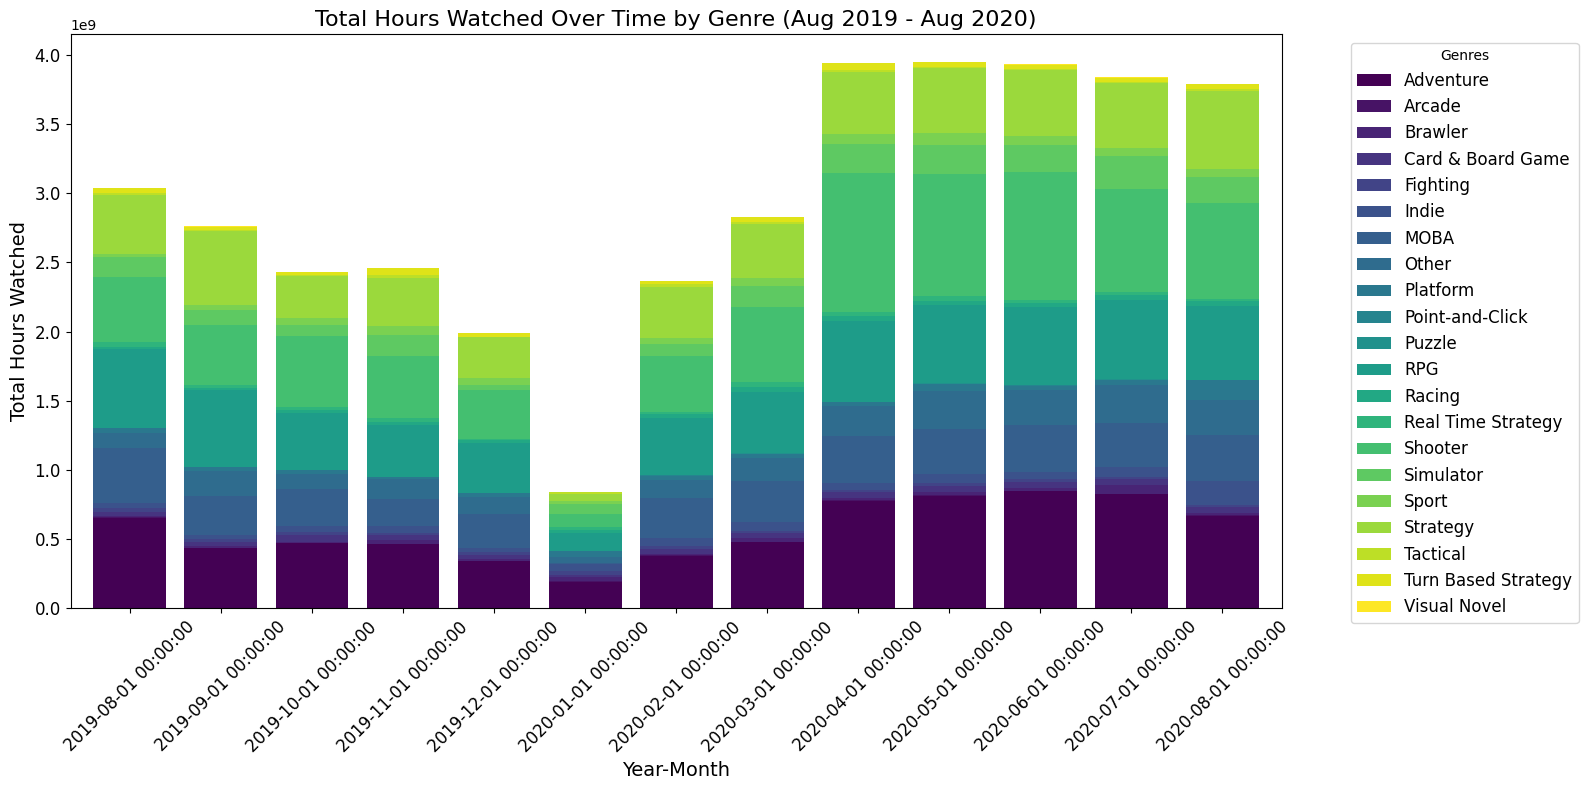

In [29]:
import matplotlib.pyplot as plt

# Ensure the pivot table is set up correctly
df_genre_time = df_genre_analysis.groupby(['Date', 'Genres'])['Hours_watched'].sum().reset_index()

# Create a pivot table with genres as columns and YearMonth as rows
genre_time_pivot = df_genre_time.pivot(index='Date', columns='Genres', values='Hours_watched').fillna(0)

# Slice the pivot table to the desired date range
genre_time_pivot = genre_time_pivot.loc['2019-08':'2020-08']

# Plot the stacked bar chart
genre_time_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 8),
    cmap='viridis',
    width=0.8
)

# Add chart titles and labels
plt.title('Total Hours Watched Over Time by Genre (Aug 2019 - Aug 2020)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Hours Watched', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [30]:
print(df_2020.columns)
print(df_genre_analysis.columns)


Index(['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_streamed',
       'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
       'Avg_channels', 'Avg_viewer_ratio', 'Date', 'Viewer_Streamer_Ratio',
       'Hours_per_Channel'],
      dtype='object')
Index(['Game', 'Date', 'Hours_watched', 'Hours_streamed', 'Peak_viewers',
       'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels',
       'Avg_viewer_ratio', 'Viewer_Streamer_Ratio', 'Hours_per_Channel',
       'Genres', 'Month'],
      dtype='object')


# Bubble Chart 
Relationship between average viewers, streamers, and hours watched
A bubble chart can simultaneously display the popularity (hours watched), engagement (average viewers), and activity level (streamers).

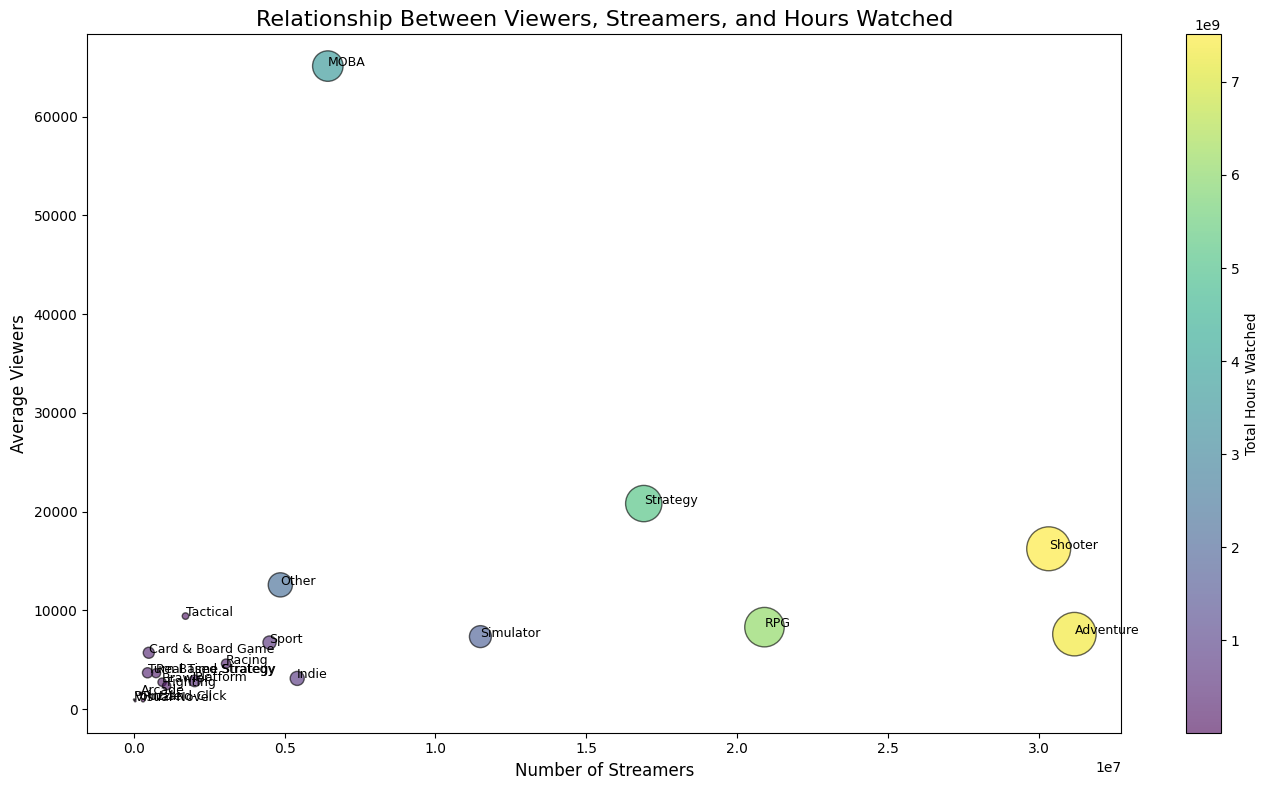

In [31]:
# Aggregation for bubble chart
bubble_data = df_genre_analysis.groupby('Genres').agg({
    'Avg_viewers': 'mean',
    'Streamers': 'sum',
    'Hours_watched': 'sum'
}).reset_index()

# Normalize bubble size for better visualization
bubble_data['Bubble_size'] = bubble_data['Hours_watched'] / bubble_data['Hours_watched'].max() * 1000

# Plot bubble chart
plt.figure(figsize=(14, 8))
plt.scatter(
    bubble_data['Streamers'], bubble_data['Avg_viewers'],
    s=bubble_data['Bubble_size'], alpha=0.6, c=bubble_data['Hours_watched'], cmap='viridis', edgecolor='k'
)
plt.colorbar(label='Total Hours Watched')
plt.title('Relationship Between Viewers, Streamers, and Hours Watched', fontsize=16)
plt.xlabel('Number of Streamers', fontsize=12)
plt.ylabel('Average Viewers', fontsize=12)

# Annotate with genres
for i, row in bubble_data.iterrows():
    plt.text(row['Streamers'], row['Avg_viewers'], row['Genres'], fontsize=9)

plt.tight_layout()
plt.show()


In [60]:
import plotly.express as px

# Aggregation for bubble chart
bubble_data = df_genre_analysis.groupby('Genres').agg({
    'Avg_viewers': 'mean',
    'Streamers': 'sum',
    'Hours_watched': 'sum'
}).reset_index()

# Normalize bubble size for better visualization
bubble_data['Bubble_size'] = bubble_data['Hours_watched'] / bubble_data['Hours_watched'].max() * 1000

# Create an interactive bubble chart with Plotly
fig = px.scatter(
    bubble_data,
    x='Streamers',
    y='Avg_viewers',
    size='Bubble_size',
    color='Hours_watched',
    hover_name='Genres',  # Display genre names on hover
    title='Relationship Between Viewers, Streamers, and Hours Watched',
    labels={
        'Streamers': 'Number of Streamers',
        'Avg_viewers': 'Average Viewers',
        'Hours_watched': 'Total Hours Watched'
    },
    color_continuous_scale='Viridis'
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Number of Streamers',
    yaxis_title='Average Viewers',
    title_font_size=16,
    xaxis=dict(title_font_size=12),
    yaxis=dict(title_font_size=12)
)

# Show the interactive plot
fig.show()


In [57]:
import plotly.express as px
import plotly.graph_objects as go

# Aggregation for bubble chart
bubble_data = df_genre_analysis.groupby('Genres').agg({
    'Avg_viewers': 'mean',
    'Streamers': 'sum',
    'Hours_watched': 'sum'
}).reset_index()

# Normalize bubble size for better visualization
bubble_data['Bubble_size'] = bubble_data['Hours_watched'] / bubble_data['Hours_watched'].max() * 1000

# Create an interactive bubble chart with Plotly
fig = px.scatter(
    bubble_data,
    x='Streamers',
    y='Avg_viewers',
    size='Bubble_size',
    color='Hours_watched',
    hover_name='Genres',  # Display genre names on hover
    title='Relationship Between Viewers, Streamers, and Hours Watched',
    labels={
        'Streamers': 'Number of Streamers',
        'Avg_viewers': 'Average Viewers',
        'Hours_watched': 'Total Hours Watched'
    },
    color_continuous_scale='Viridis'
)

# Add genre labels and connector lines
for i, genre in enumerate(bubble_data['Genres']):
    # Position the label slightly above and to the right of the bubble
    x_label = bubble_data['Streamers'][i] + 0.05 * bubble_data['Streamers'].max()
    y_label = bubble_data['Avg_viewers'][i] + 0.05 * bubble_data['Avg_viewers'].max()

    # Add a connector line from the bubble to the label
    fig.add_trace(go.Scatter(
        x=[bubble_data['Streamers'][i], x_label],
        y=[bubble_data['Avg_viewers'][i], y_label],
        mode='lines',
        line=dict(color='grey', width=1),
        showlegend=False
    ))

    # Add the genre label with black text and transparent background
    fig.add_annotation(
        x=x_label,
        y=y_label,
        text=genre,
        showarrow=False,
        font=dict(
            size=10,
            color='black'
        ),
        bgcolor='rgba(0, 0, 0, 0)',  # Completely transparent background
        borderpad=4,
        borderwidth=1,
        bordercolor='white',
        opacity=0.8
    )

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Number of Streamers',
    yaxis_title='Average Viewers',
    title_font_size=16,
    xaxis=dict(title_font_size=12),
    yaxis=dict(title_font_size=12),
    margin=dict(t=50, b=50, l=50, r=50)
)

# Show the interactive plot
fig.show()

# Treemap
Genre Popularity Based on Total Hours Watched.

Treemaps give a proportional representation of popularity across genres.

In [32]:
import plotly.express as px
import pandas as pd

# Treemap data
treemap_data = bubble_data.sort_values('Hours_watched', ascending=False)

# Create a Treemap
fig = px.treemap(
    treemap_data,
    path=['Genres'],  # Hierarchy: genres
    values='Hours_watched',  # Size of the boxes
    color='Hours_watched',  # Color based on total hours watched
    color_continuous_scale='Viridis',
    title='Genre Popularity Based on Total Hours Watched'
)

# Update the layout for readability
fig.update_traces(
    textinfo='label+value',  # Show genre names and hours watched
    hovertemplate='<b>%{label}</b><br>Total Hours Watched: %{value}<extra></extra>'
)

# Update the figure layout
fig.update_layout(
    title_font_size=20,
    margin=dict(t=50, l=25, r=25, b=25)  # Add some padding for better visuals
)

# Display the Treemap
fig.show()


# Pairplot
Exploring relationships between Twitch metrics across genres.

A pairplot allows you to explore pairwise relationships in the data.

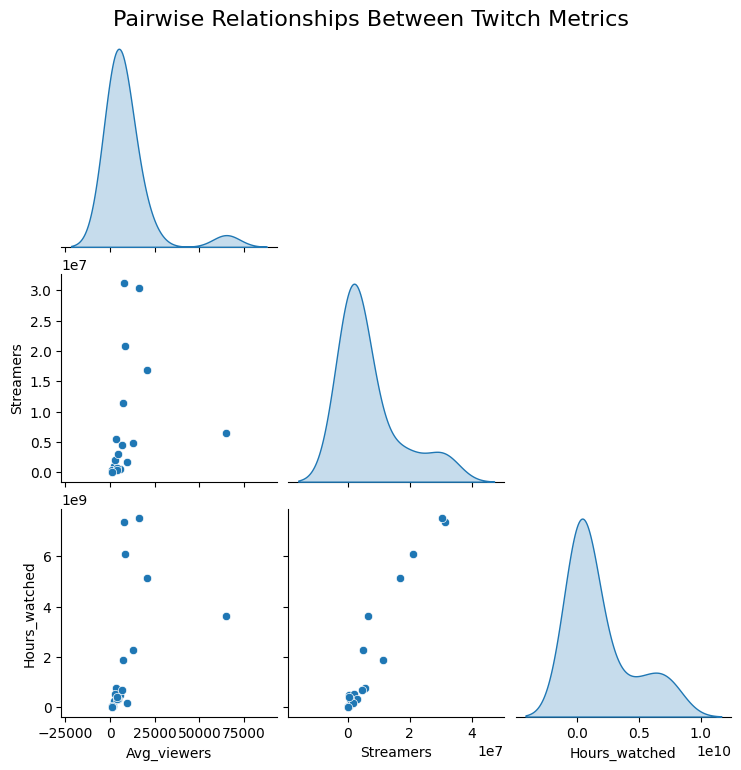

In [33]:
# Select numerical columns for pairplot
pairplot_data = bubble_data[['Avg_viewers', 'Streamers', 'Hours_watched']]

# Pairplot
sns.pairplot(pairplot_data, diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Between Twitch Metrics', y=1.02, fontsize=16)
plt.show()


# **Composite Visualizations**

Composite visualizations combine multiple types of charts into a single view. 



# Time Series Visualization
A time series visualization can show monthly trends.

Juxtaposed view of interactive stacked area and line charts of the comparison of Total and Average Watch Time by Genre

In [61]:
import pandas as pd
import plotly.graph_objects as go

# ---- Data Preparation ----
# Total watch time
df_genre_time = df_genre_analysis.groupby(['Date', 'Genres'])['Hours_watched'].sum().reset_index()
genre_time_pivot = df_genre_time.pivot(index='Date', columns='Genres', values='Hours_watched').fillna(0)
genre_time_pivot = genre_time_pivot.loc['2019-08-01':'2020-08-31']

# Average watch time
df_genre_avg = df_genre_analysis.groupby(['Date', 'Genres']).agg({
    'Hours_watched': 'sum',
    'Game': 'nunique'  # Count unique games
}).reset_index()
df_genre_avg['Avg_watch_time_per_game'] = df_genre_avg['Hours_watched'] / df_genre_avg['Game']
genre_avg_pivot = df_genre_avg.pivot(index='Date', columns='Genres', values='Avg_watch_time_per_game').fillna(0)
genre_avg_pivot = genre_avg_pivot.loc['2019-08-01':'2020-08-31']

# ---- Interactive Plot for Total Watch Time ----
fig_total = go.Figure()
for genre in genre_time_pivot.columns:
    fig_total.add_trace(
        go.Scatter(
            x=genre_time_pivot.index,
            y=genre_time_pivot[genre],
            mode='lines',
            name=genre,
            hoverinfo='name+x+y',
            stackgroup='one'  # Enables stacked area chart
        )
    )
fig_total.update_layout(
    title="Total Hours Watched Over Time by Genre (Aug 2019 - Aug 2020)",
    xaxis_title="Date",
    yaxis_title="Total Hours Watched",
    legend_title="Genres",
    template="plotly",
    hovermode="x unified",
)

# ---- Interactive Plot for Average Watch Time ----
fig_avg = go.Figure()
for genre in genre_avg_pivot.columns:
    fig_avg.add_trace(
        go.Scatter(
            x=genre_avg_pivot.index,
            y=genre_avg_pivot[genre],
            mode='lines',
            name=genre,
            hoverinfo='name+x+y'
        )
    )
fig_avg.update_layout(
    title="Average Watch Time Per Game Over Time by Genre (Aug 2019 - Aug 2020)",
    xaxis_title="Date",
    yaxis_title="Average Hours Watched Per Game",
    legend_title="Genres",
    template="plotly",
    hovermode="x unified",
)

# ---- Display Side-by-Side Interactive Plots ----
from plotly.subplots import make_subplots

# Create a subplot figure
fig_combined = make_subplots(
    rows=1, cols=2, shared_yaxes=False,
    subplot_titles=[
        "Total Hours Watched Over Time by Genre",
        "Average Watch Time Per Game Over Time by Genre"
    ]
)

# Add total watch time plot
for genre in genre_time_pivot.columns:
    fig_combined.add_trace(
        go.Scatter(
            x=genre_time_pivot.index,
            y=genre_time_pivot[genre],
            mode='lines',
            name=genre,
            stackgroup='one',
            hoverinfo='name+x+y'
        ),
        row=1, col=1
    )

# Add average watch time plot
for genre in genre_avg_pivot.columns:
    fig_combined.add_trace(
        go.Scatter(
            x=genre_avg_pivot.index,
            y=genre_avg_pivot[genre],
            mode='lines',
            name=genre,
            hoverinfo='name+x+y'
        ),
        row=1, col=2
    )

fig_combined.update_layout(
    height=600, width=1200,
    title_text="Total and Average Watch Time by Genre(Month-wise): Juxtaposed view",
    hovermode="x unified"
)

# Display the combined plot
fig_combined.show()


# **Set Visualizations**

# Venn Diagram: 
Genre Overlap by Game Count: Top 3 Genres

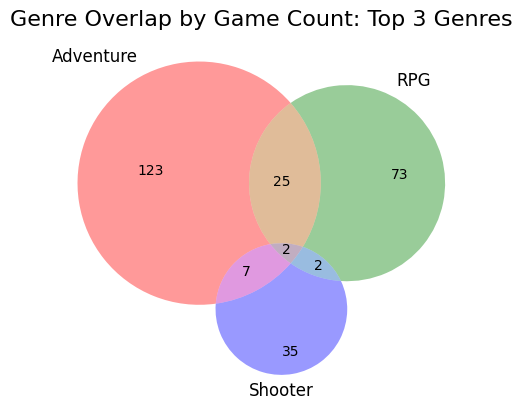

In [35]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Example genre sets (based on games)
adventure_games = set(df_genre_analysis[df_genre_analysis['Genres'] == 'Adventure']['Game'])
shooter_games = set(df_genre_analysis[df_genre_analysis['Genres'] == 'Shooter']['Game'])
strategy_games = set(df_genre_analysis[df_genre_analysis['Genres'] == 'Strategy']['Game'])

# Plot Venn Diagram
venn3([adventure_games, shooter_games, strategy_games], ('Adventure', 'RPG', 'Shooter'))
plt.title('Genre Overlap by Game Count: Top 3 Genres', fontsize=16)
plt.show()


# Upset Plot
A preferred visualization to visualize sets

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Library/F

<Figure size 1200x800 with 0 Axes>

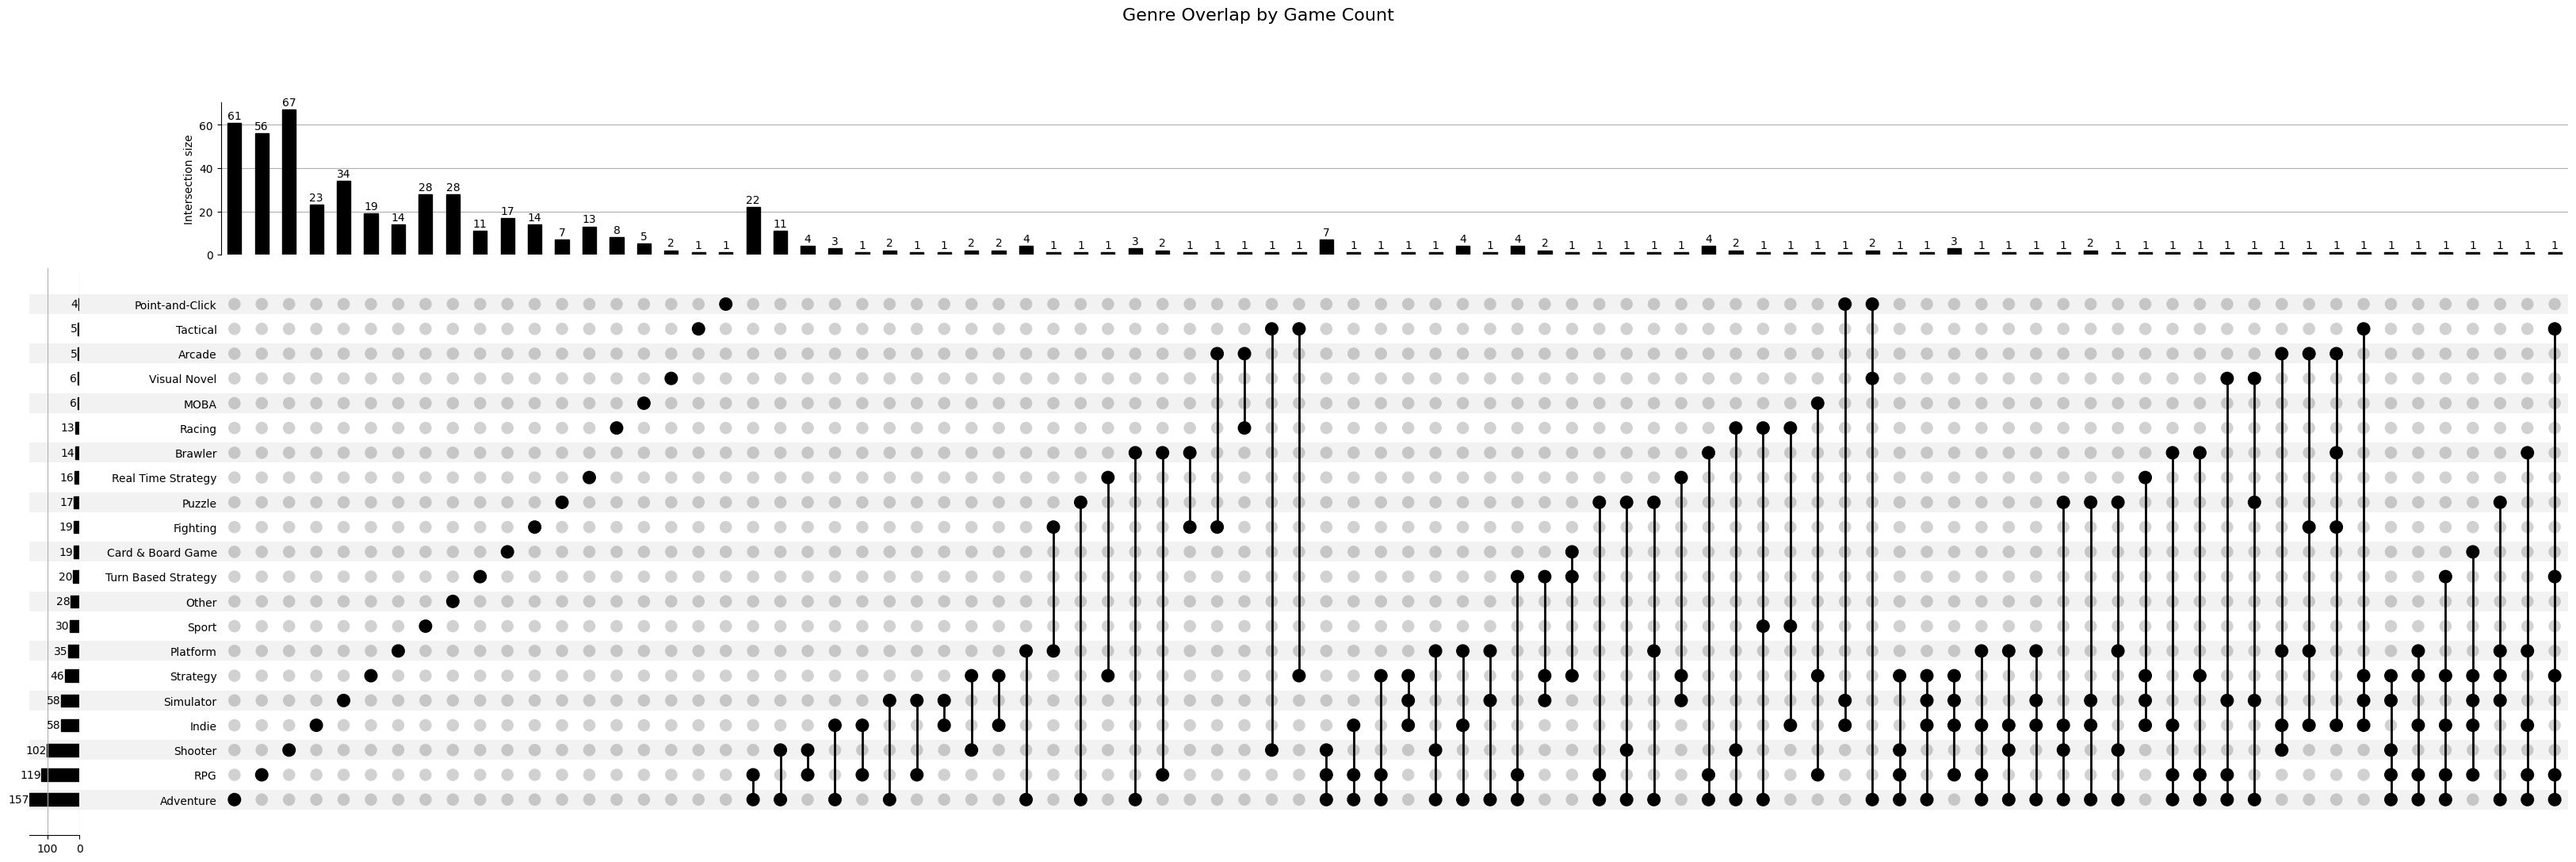

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Step 1: Prepare data for genre overlap
genre_game_mapping = df_genre_analysis[['Game', 'Genres']]  # Ensure the dataset contains 'Game' and 'Genres'
genre_game_mapping = genre_game_mapping.drop_duplicates()  # Remove duplicate rows for games and genres

# Create a list of memberships (e.g., genres associated with each game)
membership_list = genre_game_mapping.groupby('Game')['Genres'].apply(list)

# Step 2: Create a membership dictionary for the UpSet plot
memberships = []
for genres in membership_list:
    memberships.append(tuple(genres))

# Convert to a format suitable for UpSet plotting
upset_data = from_memberships(memberships)

# Step 3: Plot the UpSet plot
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.suptitle('Genre Overlap by Game Count', fontsize=16)
plt.show()


In [37]:
# Check for duplicate column names
print(df_genre_analysis.columns[df_genre_analysis.columns.duplicated()])


Index([], dtype='object')


In [38]:
# Save df_genre_analysis to a CSV file
output_file = "df_genre_analysis.csv"
df_genre_analysis.to_csv(output_file, index=False)

# Confirm the save
print(f"df_genre_analysis successfully saved to {output_file}")


df_genre_analysis successfully saved to df_genre_analysis.csv


In [39]:
df_genre_analysis_for_model = df_genre_analysis
df_genre_analysis_for_model.head()

Game       Date  Hours_watched  Hours_streamed  Peak_viewers  \
0           Fortnite 2019-08-01       89053008         5436945        357529   
1           Fortnite 2019-08-01       89053008         5436945        357529   
2           Fortnite 2019-08-01       89053008         5436945        357529   
3           Fortnite 2019-08-01       89053008         5436945        357529   
4  League of Legends 2019-08-01       86094493         1977780        455329   

   Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
0          14870     596217       119856          7317             16.38   
1          14870     596217       119856          7317             16.38   
2          14870     596217       119856          7317             16.38   
3          14870     596217       119856          7317             16.38   
4           5256     187707       115874          2661             43.53   

   Viewer_Streamer_Ratio  Hours_per_Channel     Genres  Month  
0               0.201027        5988.769872  Adventure      8  
1               0.201027        5988.769872        RPG      8  
2               0.201027        5988.769872    Shooter      8  
3               0.201027        5988.769872   Strategy      8  
4               0.617313       16380.230784       MOBA      8

# ***Phase 3: Regression Model***



Let's create a regression model predicting Hours_watched based on the other features(in df_genre_analysis_for_model dataset)


# Preprocessing the Data
We need to handle categorical features (Genres, Month) by encoding them.
We may also need to handle missing values, scaling numerical features, and preparing the dataset for training.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
df = df_genre_analysis_for_model

# Define target and features
X = df.drop(columns=['Hours_watched', 'Game', 'Date'])  # Drop non-numeric columns
y = df['Hours_watched']

# Define categorical and numerical features
categorical_features = ['Genres', 'Month']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Preprocessing pipeline for numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Combine both pipelines into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Create a pipeline that first preprocesses data and then fits the model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


R²: 0.9972238128884786
MSE: 1246749579932.9824
RMSE: 1116579.410491248


Hyperparameter Tuning is not necessary as the R2 score is pretty good

# Train-Test Split
Split the data into a training and test set for model evaluation.

# Model Creation
Plan: to use a regression model like Random Forest Regressor, XGBoost Regressor, or Linear Regression.
Tune hyperparameters using GridSearchCV or RandomizedSearchCV for better performance.

# Evaluation
Evaluate the model performance using metrics like R², MSE (Mean Squared Error), or RMSE (Root Mean Squared Error).

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Assuming df_genre_analysis_for_model is your dataframe
# One-hot encode the 'Genres' column
df_genre_encoded = pd.get_dummies(df_genre_analysis_for_model, columns=['Genres'])

# Split the data into features and target
X = df_genre_encoded.drop(['Hours_watched', 'Game', 'Date'], axis=1)  # Remove non-feature columns
y = df_genre_encoded['Hours_watched']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Output the evaluation metrics
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")



R²: 0.9998708431266149
MSE: 58002674592.8091
RMSE: 240837.44433291326


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



An R2 value close to 1 suggests that the model explains nearly all of the variance in the target variable (Hours_watched), which indicates a very good fit.

# Model Interpretation
To perform model interpretation for the regression model, we'll break it into steps and provide the relevant code blocks and visualizations for each step.

# Extracting Model Coefficients
First, we’ll examine the coefficients of the regression model to understand the importance of each feature. Since we one-hot encoded the Genres, the model will give coefficients for each genre (represented as separate features).


In [65]:
# Get the model coefficients
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients


Coefficient
Genres_MOBA                 59578.063454
Genres_Strategy              8958.992958
Genres_Simulator             6124.145146
Genres_RPG                   5568.922878
Genres_Shooter               4929.277159
Genres_Adventure             3218.640028
Avg_viewers                   732.749848
Month                         518.198666
Genres_Indie                  446.384714
Peak_channels                  33.458187
Hours_streamed                 24.530711
Streamers                       1.106448
Hours_per_Channel               0.983222
Peak_viewers                   -0.148439
Avg_viewer_ratio              -16.866962
Genres_Tactical              -993.604152
Viewer_Streamer_Ratio       -1081.702859
Genres_Brawler              -1582.435621
Genres_Platform             -2775.911896
Genres_Puzzle               -2931.493385
Genres_Fighting             -3041.061934
Genres_Turn Based Strategy  -5309.946316
Genres_Racing               -5487.971606
Genres_Visual Novel         -5529.263893
Genres_Arcade               -6064.931985
Genres_Sport                -7474.539945
Genres_Other                -8293.854111
Genres_Real Time Strategy   -9306.347565
Genres_Card & Board Game   -11279.064009
Avg_channels               -18161.174750
Genres_Point-and-Click     -18753.999918

# Visualizing the Coefficients
Visualizing the coefficients can help us understand the relative importance of each feature. Higher magnitude coefficients indicate stronger relationships with the target variable, while lower magnitude coefficients indicate weaker relationships.

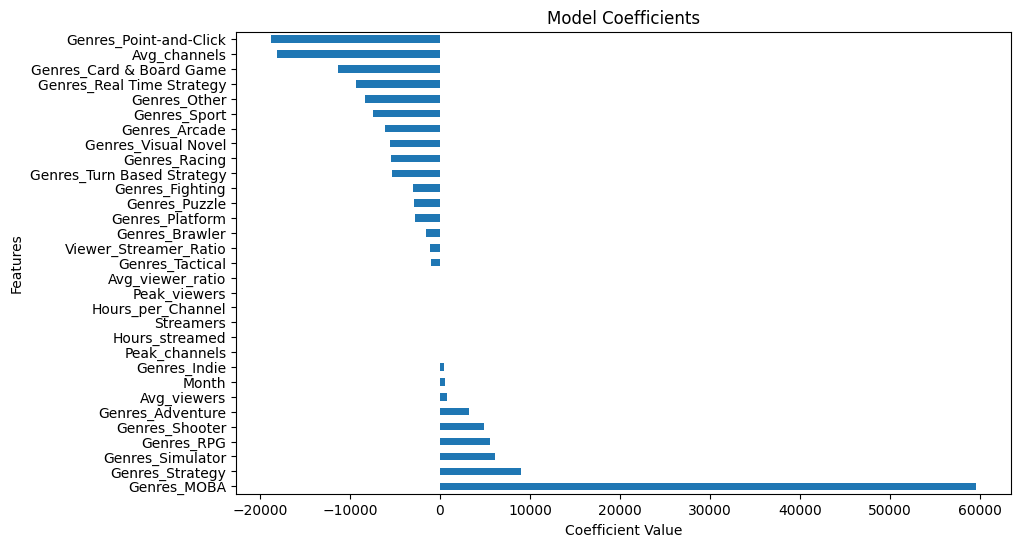

In [ ]:
import matplotlib.pyplot as plt

# Plot the coefficients
plt.figure(figsize=(10, 6))
coefficients['Coefficient'].plot(kind='barh')
plt.title('Model Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


# Examining the Influence of Categorical Features (Genres)
Since Genres was one-hot encoded into multiple binary features, each genre will have its own coefficient. To interpret the importance of each genre, we can look at the coefficients corresponding to the genre columns.

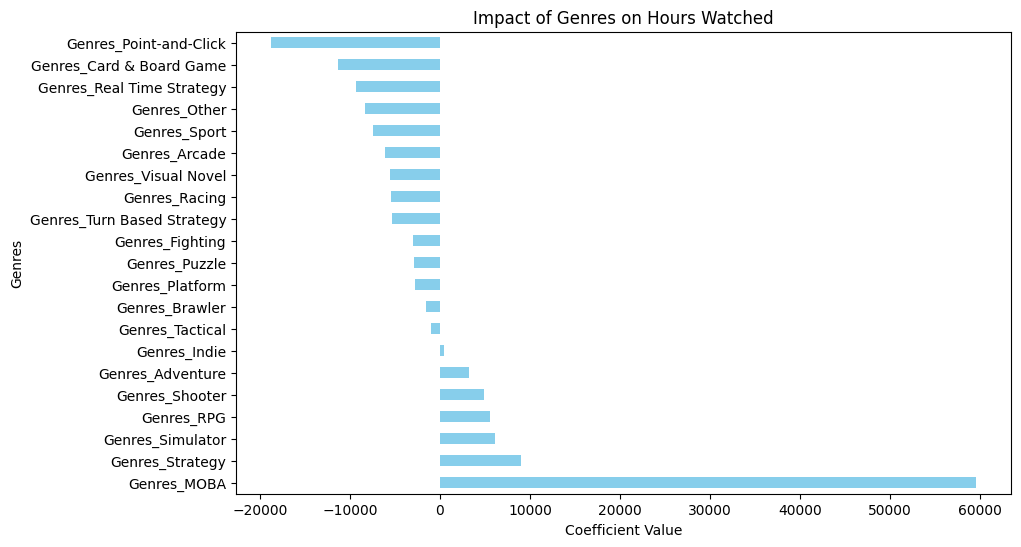

In [44]:
# Extract genre-related coefficients
genre_columns = [col for col in coefficients.index if 'Genres_' in col]
genre_coefficients = coefficients.loc[genre_columns]

# Visualize genre coefficients
plt.figure(figsize=(10, 6))
genre_coefficients['Coefficient'].plot(kind='barh', color='skyblue')
plt.title('Impact of Genres on Hours Watched')
plt.xlabel('Coefficient Value')
plt.ylabel('Genres')
plt.show()


# Visualizing Correlation Matrix
A correlation matrix can help us understand how strongly features are correlated with each other and the target variable. This can be helpful in identifying redundant features

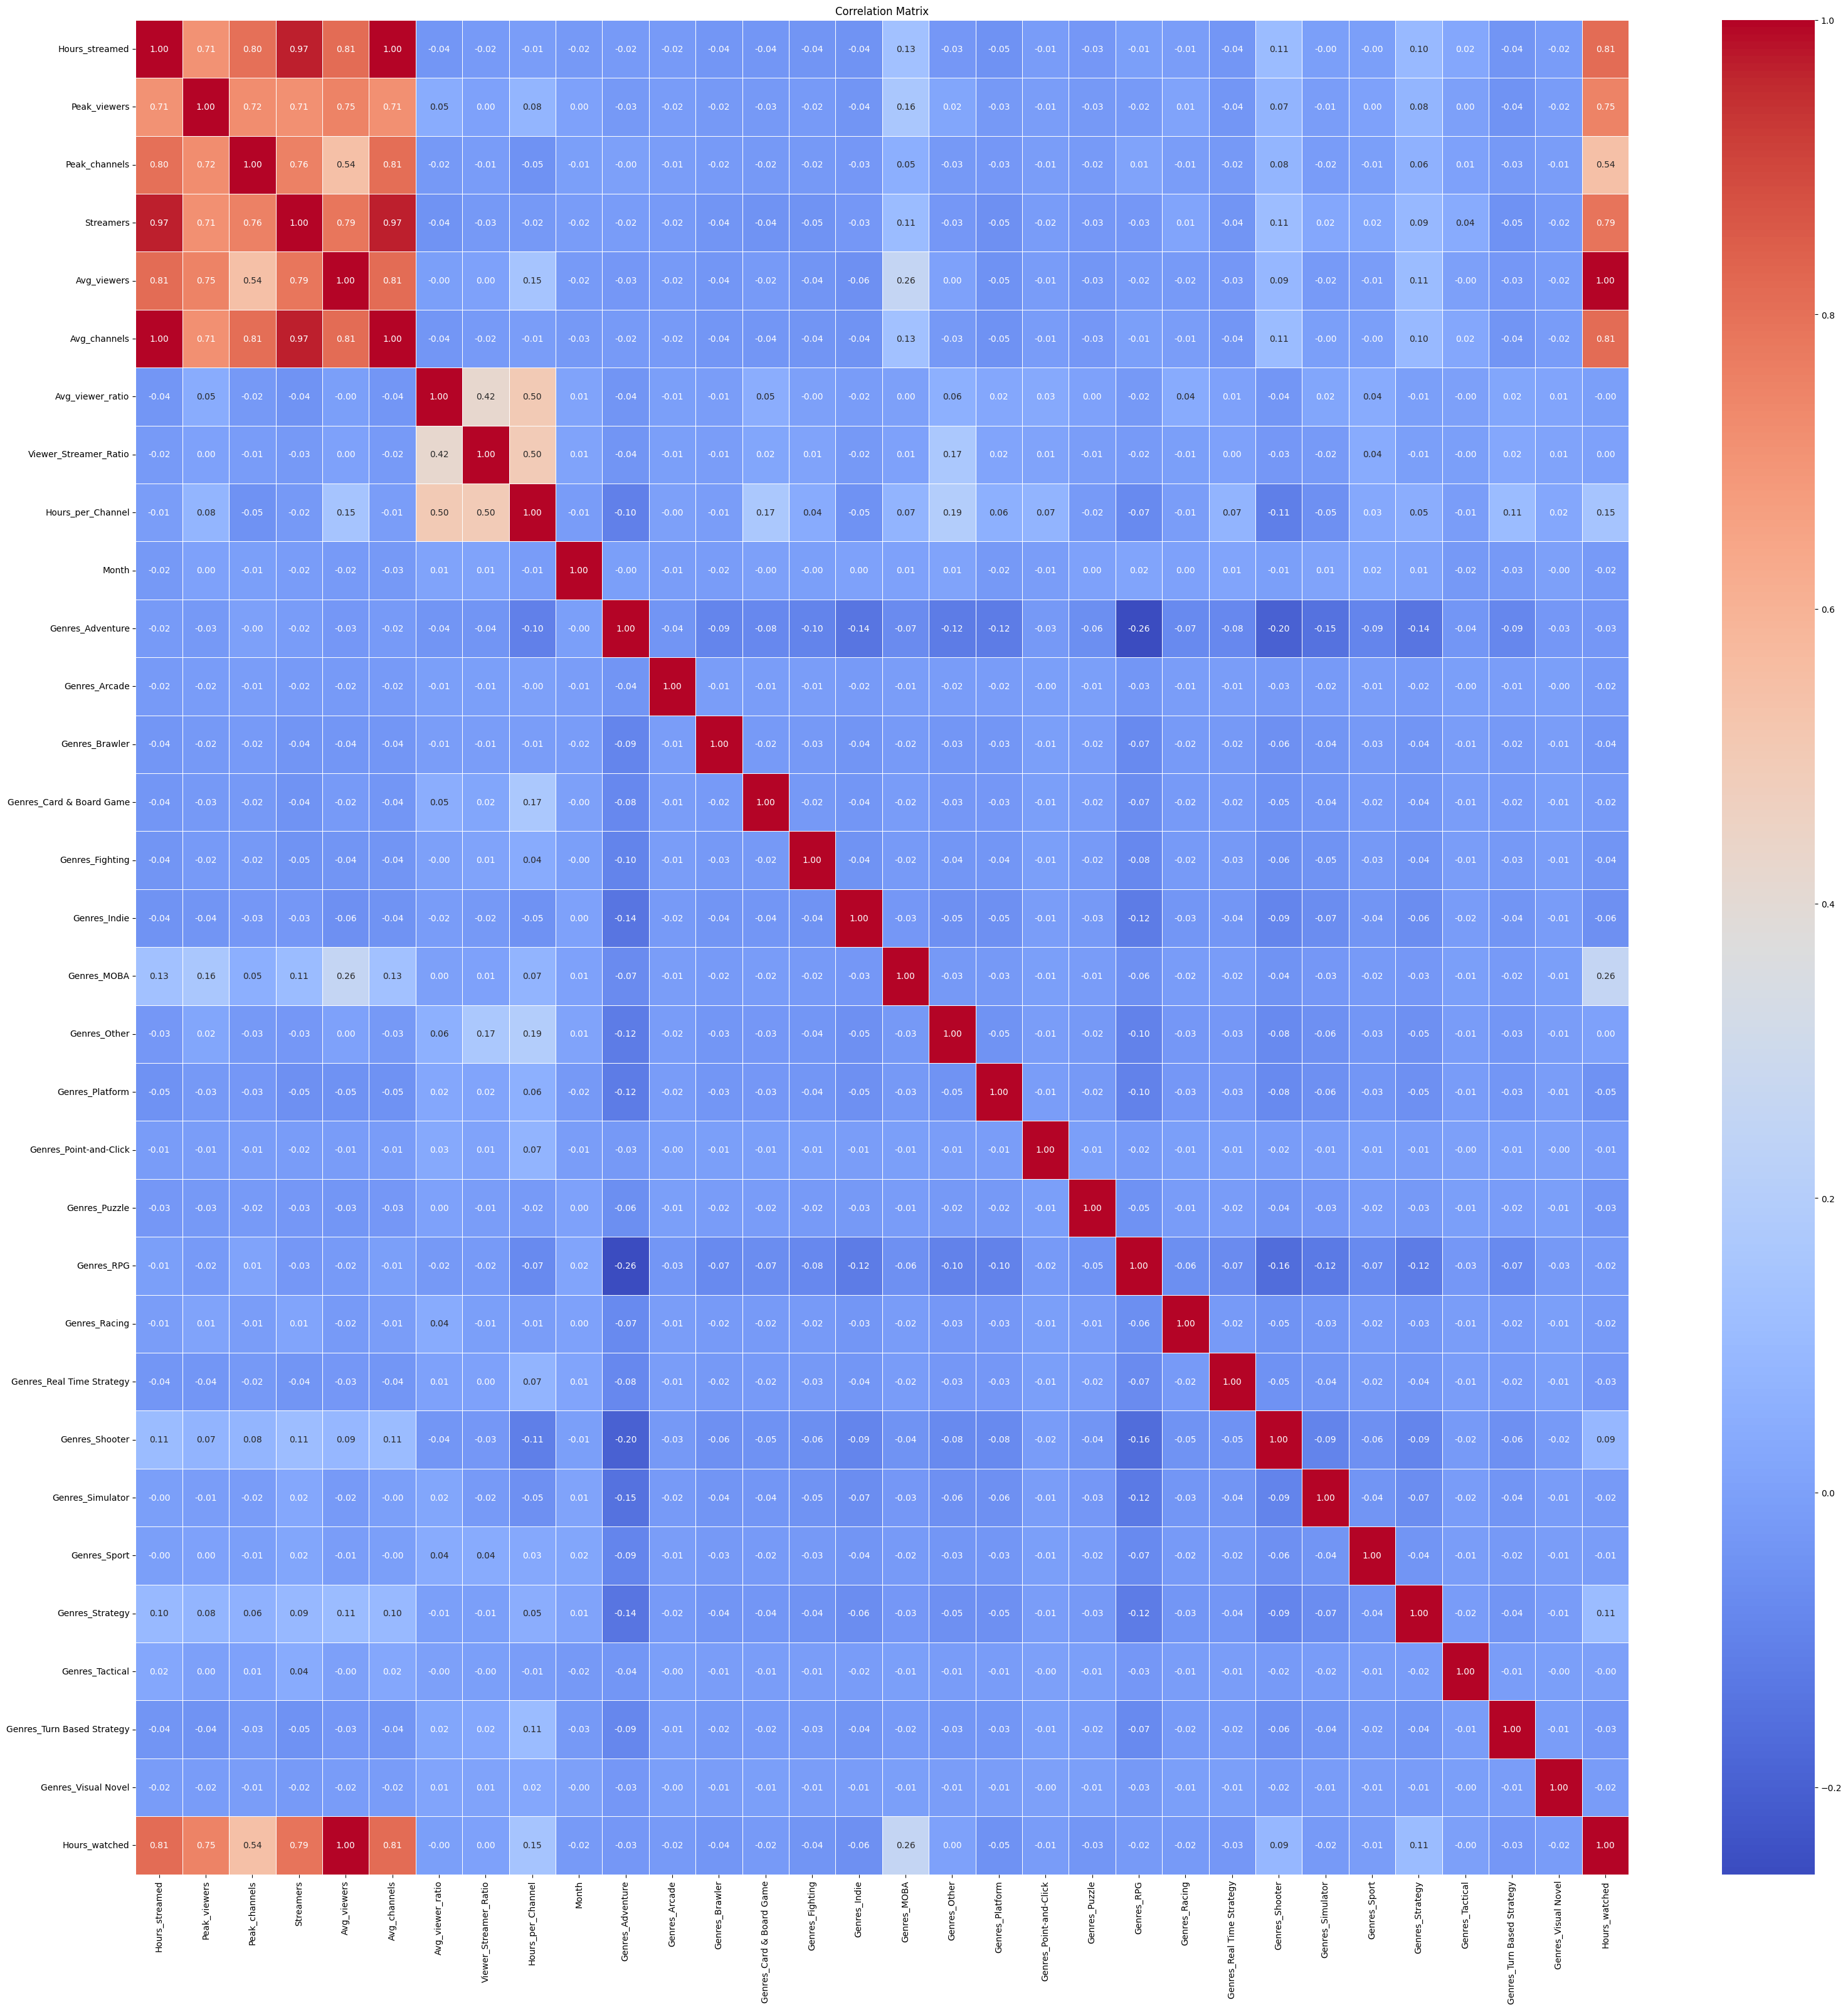

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X_train.join(y_train).corr()

# Dynamically adjust the figure size based on the number of features
num_features = corr_matrix.shape[0]
plt.figure(figsize=(num_features * 1.2, num_features * 1.2))  # Scale figure size dynamically

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Interpreting the Model’s Performance
Finally, after understanding the features and their contributions, you can also interpret the model's performance using various metrics like R², MSE, and RMSE.

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R²: 0.9999
MSE: 58002674592.8091
RMSE: 240837.4443


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



# Conclusion
Model coefficients reveal how each feature (including genres) influences Hours_watched.
Correlation matrix help ensure that no features are highly collinear, which could impact model interpretation.
Performance metrics provide insight into how well the model is generalizing.

Based on the performance metrics, we can infer that adding the Genres column, and one hot encoding its categorical data can help us generate a very accurate model with 0.9999 R2 score